In [255]:
import numpy as np
import openpyxl as xl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [146]:
import networkx as nx
fname = 'db_mli_pc_231209_v2.gz'
G = nx.read_gpickle(fname)

In [251]:
# for nid in G.nodes:
#     print(f'{nid}: {G.nodes(data=True)[nid]}')

In [148]:
#print(G.adj['interneuron_81'].keys())

In [149]:
# # Prints connections of neuron (no duplicates)
# nid = 'interneuron_81'
# print(f'postsyn of {nid}: {list(G.successors(nid))}')

postsyn of interneuron_81: ['interneuron_142', 'interneuron_164', 'interneuron_237', 'interneuron_238', 'interneuron_251', 'interneuron_255', 'interneuron_273', 'interneuron_40', 'pc_33']


In [158]:
# Prints the connections between one neuron and one possible connections
def connections(name_neuron, possible_connection):
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))

    counter = 0
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1
                print(connection)
            
                
    if (counter == 0):
        print('No connections found between', name_neuron, 'and', 
        possible_connection)
    counter = 0

# Prints the number of connections between a neuron
# (name_neuron) and a target neuron (possible_connections)
def numConnections(name_neuron, possible_connection):
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))
    numConnections = []
    counter = 0
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1        
                
    print("Number of connections from", name_neuron, "to", possible_connection, ":", counter)
            
        
        
        
# Prints all connections between each neuron in a list of
# neurons and a certain other neuron (connect). Also prints # of connections are between the two    
def check_all_connects(neurons, connect):

    for neuron in neurons:
        connections(neuron, connect)
        print("")
        
    for neuron in neurons:
        numConnections(neuron, connect)


In [195]:
neurons = ['interneuron_191',
'interneuron_188',
'interneuron_99',
'interneuron_173',
'interneuron_179',
'interneuron_178',
'interneuron_134',
'interneuron_185',
'interneuron_131',
'interneuron_95',
'interneuron_116',
'interneuron_177',
'interneuron_126'
]

In [252]:
check_all_connects(neurons, 'pc_16')

No connections found between interneuron_191 and pc_16

('interneuron_188', 'pc_16', {'xyz': (122416.0, 71112.0, 640.0), 'area': 0.08316011177838174})
('interneuron_188', 'pc_16', {'xyz': (123784.0, 73116.0, 687.0), 'area': 0.04578628617152932})
('interneuron_188', 'pc_16', {'xyz': (125396.0, 73804.0, 717.0), 'area': 0.022132961187106472})
('interneuron_188', 'pc_16', {'xyz': (126680.0, 69432.0, 768.0), 'area': 0.08940013561812132})
('interneuron_188', 'pc_16', {'xyz': (121364.0, 93436.0, 768.0), 'area': 0.11790202648769699})
('interneuron_188', 'pc_16', {'xyz': (105516.0, 70948.0, 822.0), 'area': 0.063169404177281})
('interneuron_188', 'pc_16', {'xyz': (105560.0, 71048.0, 823.0), 'area': 0.035347752267545975})
('interneuron_188', 'pc_16', {'xyz': (107960.0, 68192.0, 834.0), 'area': 0.07601197904291823})
('interneuron_188', 'pc_16', {'xyz': (105632.0, 70904.0, 834.0), 'area': 0.07595803254147722})
('interneuron_188', 'pc_16', {'xyz': (105712.0, 70964.0, 837.0), 'area': 0.07130146062847

In [164]:
def bool_check_connects(name_neuron, possible_connection):
    ret = False
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))
    numConnections = []
    counter = 0
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1                      
    if (counter > 0):
        ret = True
    return ret

# print(bool_check_connects('interneuron_188', 'pc_16'))

True


In [209]:
# # Opens an excel file and writes all the wanted data from connections
# def automate_connections_id(name_neuron, possible_connection, xl_file_path):
#     excel_file_path = r'C:\Users\regehr2\Downloads\test-book.xlsx'
#     workbook = xl.load_workbook(xl_file_path)
#     row_number, col_number = 1, 1
#     list(G.out_edges(name_neuron, data=True))
#     connects = list(G.out_edges(name_neuron, data=True))
#     sheet = workbook.active
#     sheet.delete_cols(1, sheet.max_row)
#     sheet.delete_cols(2, sheet.max_row)
#     sheet.delete_cols(3, sheet.max_row)
#     sheet.delete_cols(4, sheet.max_row)


#     for connection in connects: 
    
            
    
#         if (connection[1] == possible_connection):
#             sheet.cell(row=row_number, column=col_number, value=connection[0])
#             sheet.cell(row=row_number, column=col_number + 1, value=connection[1])
#             it = iter(connection[2].values())
#             coord_str, area = str(next(iter(it))), next(iter(it))
#             coord = coord_str.strip('(').strip(')')
#             sheet.cell(row=row_number, column=col_number + 2, value=coord)
#             sheet.cell(row=row_number, column=col_number + 3, value=area)
#             row_number += 1

#     workbook.save(xl_file_path)

                
            
                
    

In [248]:
def list_or_string_no_connection(name, sheet, possible_connection, row):
    if isinstance(name, str):
    # If name_neuron is a single string
        if not bool_check_connects(name, possible_connection):
            sheet.cell(row=row, column=1, value=name)
            sheet.cell(row=row, column=2, value=possible_connection)
            sheet.cell(row=row, column=3, value='No Connection')
            sheet.cell(row=row, column=4, value='No Connection')
            row += 1
            return row
    else:
        # If name_neuron is a list of strings
        for n in name:
            if not bool_check_connects(n, possible_connection):
                sheet.cell(row=row, column=1, value=n)
                sheet.cell(row=row, column=2, value=possible_connection)
                sheet.cell(row=row, column=3, value='No Connection')
                sheet.cell(row=row, column=4, value='No Connection')
                row += 1
    return row
    

In [246]:
# Opens an excel file and writes all the wanted data from connections
def automate_connections_id(name_neuron, possible_connection, xl_file_path):
    
    # Activates spreadsheet and deletes anything that was already there.
    # Sets row, col, gets list of all connections
    
    # excel_file_path = r'C:\Users\regehr2\Downloads\test-book.xlsx'
    workbook = xl.load_workbook(xl_file_path)
    row_number, col_number = 1, 1
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))
    sheet = workbook.active
    sheet.delete_cols(1, sheet.max_row)
    sheet.delete_cols(2, sheet.max_row)
    sheet.delete_cols(3, sheet.max_row)
    sheet.delete_cols(4, sheet.max_row)
    
    # Goes through all neurons with no connection to possible_connection and writes no connection in 
    # spreadsheet
    row_number = list_or_string_no_connection(name_neuron, sheet, possible_connection, row_number)
    
    
    # Goes through list of connections of input(s) and filters out non wanted connections then
    # writes it to sheet
    for connection in connects: 
        if (connection[1] == possible_connection):
                sheet.cell(row=row_number, column=col_number, value=connection[0])
                sheet.cell(row=row_number, column=col_number + 1, value=connection[1])
                sheet.cell(row=row_number, column=col_number, value=connection[0])
                sheet.cell(row=row_number, column=col_number + 1, value=connection[1])
                it = iter(connection[2].values())
                coord_str, area = str(next(iter(it))), next(iter(it))
                coord = coord_str.strip('(').strip(')')
                sheet.cell(row=row_number, column=col_number + 2, value=coord)
                sheet.cell(row=row_number, column=col_number + 3, value=area)
                row_number += 1

    workbook.save(xl_file_path)


In [189]:
# Goes through a list of neurons and writes all data from connections to each of those possible connections
# to a given xl sheet path
def automated_connections_list(loNeurons, wanted_connection, xl_path):
#     for neuron in loNeurons:
        automate_connections_id(loNeurons, wanted_connection, xl_path)
        

In [249]:
automate_connections_id('interneuron_191', 'pc_16', r'C:\Users\regehr2\Downloads\test-book.xlsx')

In [256]:
automated_connections_list(neurons,'pc_16', r'C:\Users\regehr2\Downloads\test-book.xlsx')

#  Visualizing

In [265]:
# importing data from csv File
data = pd.read_csv(r'C:\Users\regehr2\HarvardMedProjects\CellTypeDB.csv')
#filtered_data = data[data['Neuron_ID'].isin(neurons)] 

CellType_dict = dict(zip(data['Neuron_ID'], data['Cell Type']))
#print(CellType_dict)

,Neuron_ID,Cell Type
10,interneuron_191,MLI 2
11,interneuron_95,MLI 2
13,interneuron_179,MLI 2
19,interneuron_173,MLI 2
63,interneuron_188,MLI 1
64,interneuron_99,MLI 2
70,interneuron_134,MLI 2
75,interneuron_131,MLI 2
84,interneuron_126,MLI 1
129,interneuron_185,MLI 1


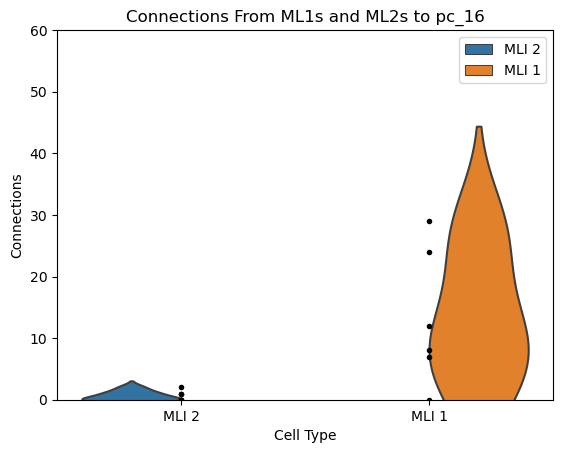

In [375]:
def put_num_connections_df_helper(name_neuron, possible_connection):
    list(G.out_edges(name_neuron, data=True))
    connects = list(G.out_edges(name_neuron, data=True))
    counter = 0
    type_num = []
    for connection in connects:
            if (connection[1] == possible_connection):
                counter += 1   
    type_num = [CellType_dict.get(name_neuron), counter]
    #rint(type_num)
    return type_num

put_num_connections_df_helper('interneuron_177', 'pc_16')

def put_num_connections_df(neurons, possible_connection, col1, col2):
    columns = [col1, col2]
    whole_list = []
    single_list = []
    index = [0] * len(neurons)
    for i, neuron in enumerate(neurons):
        single_list = put_num_connections_df_helper(neuron, possible_connection)
        index[i] = i
        whole_list.append(single_list)

        single_list = []
    
    df = pd.DataFrame(whole_list, columns=columns, index=index)# #     df = pd.DataFrame(whole_dict)
    df.loc[df['Cell Type'] == 'MLI1', 'Cell Type'] = 'MLI 1'
#     print(df)
#     plt.figure(figsize=(8, 6))
   
    
 
    
    colors = {'MLI 2' : '#73AF59', 'MLI 1' : '#FF00FF'}
    
    sns.violinplot(x=col1, y=col2, data=df,  inner=None, pallete=colors, hue=col1, scale='width')
    sns.stripplot(x=col1, y=col2, data=df, color='black', size=4, jitter=False)

    
    plt.title('Connections From ML1s and ML2s to pc_16')
    plt.ylim(0, 60)
    
    plt.show()
#     print(df)



put_num_connections_df(neurons, 'pc_16', 'Cell Type', 'Connections')
    